In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [3]:
data = pd.read_csv('Thecleverprogrammer.csv')
data

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973
...,...,...
386,22/06/2022,11154
387,23/06/2022,10382
388,24/06/2022,9555
389,25/06/2022,8502


In [4]:
data['Date'] = pd.to_datetime(data['Date'],format='%d/%m/%Y')
data

,Date,Views
0,2021-06-01,7831
1,2021-06-02,7798
2,2021-06-03,7401
3,2021-06-04,7054
4,2021-06-05,7973
...,...,...
386,2022-06-22,11154
387,2022-06-23,10382
388,2022-06-24,9555
389,2022-06-25,8502


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB


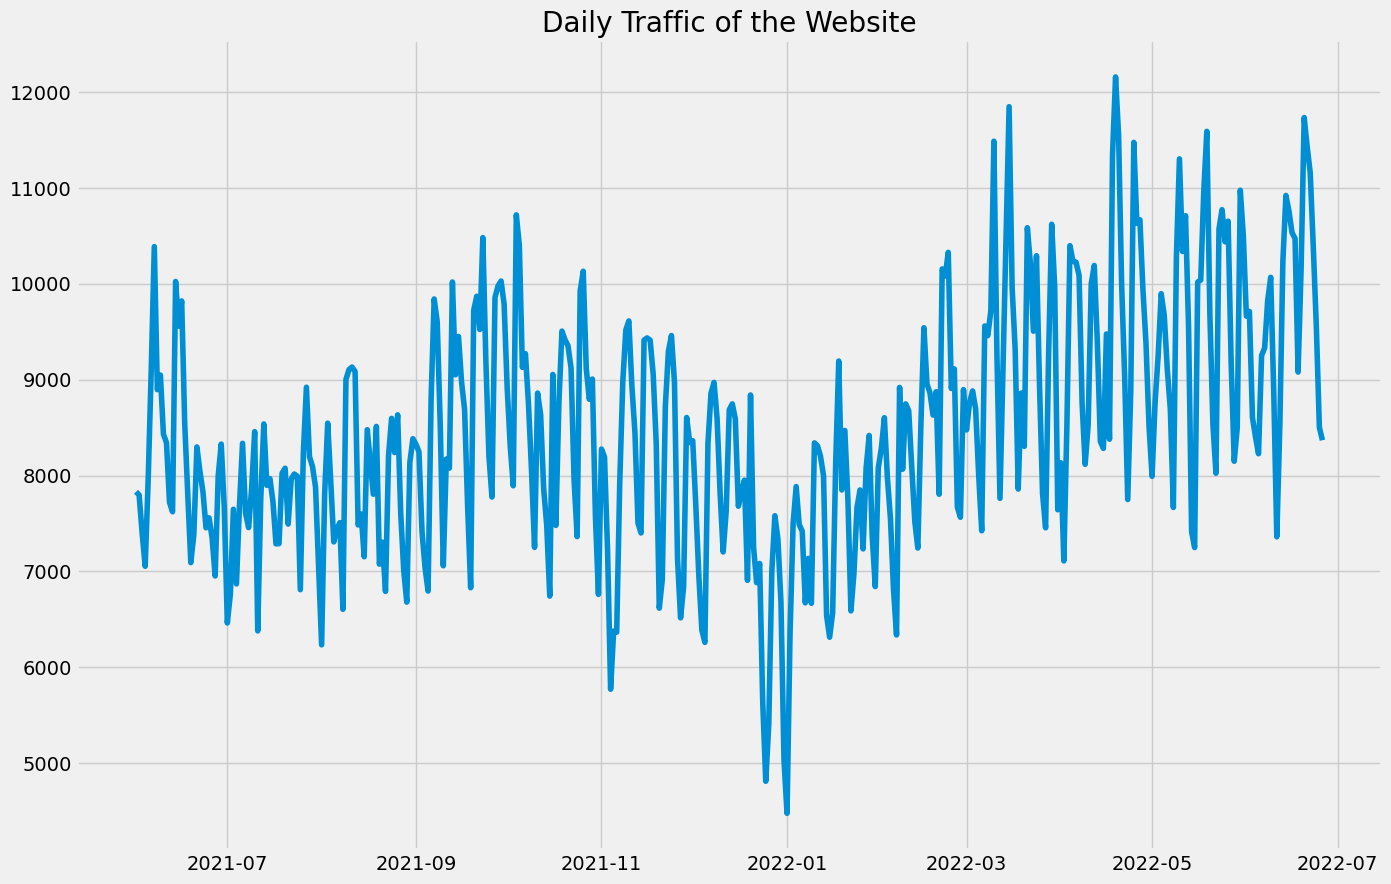

In [6]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(data['Date'],data['Views'])
plt.title('Daily Traffic of the Website')
plt.show()

<Figure size 640x480 with 0 Axes>

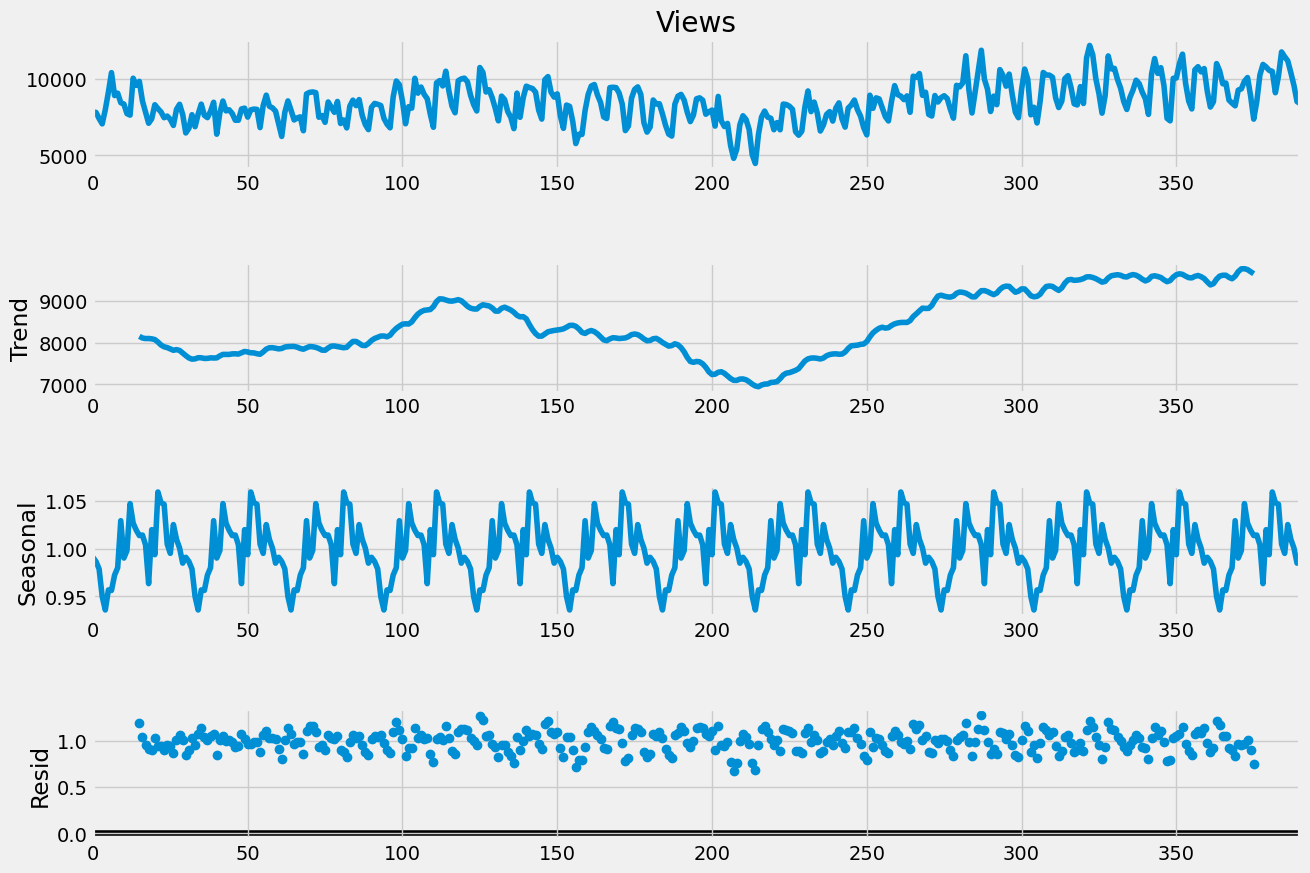

In [12]:
# to check whether data is seasonal or stationary
result = seasonal_decompose(data['Views'],
                           model='multiplicative',
                            period=30
                           )
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

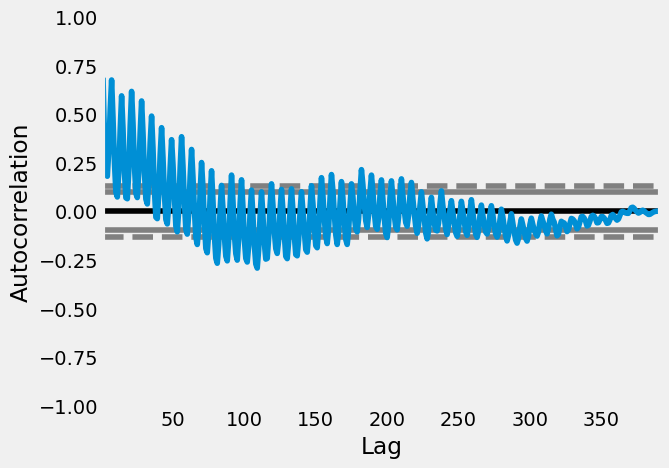

In [13]:
pd.plotting.autocorrelation_plot(data['Views'])

p = 5

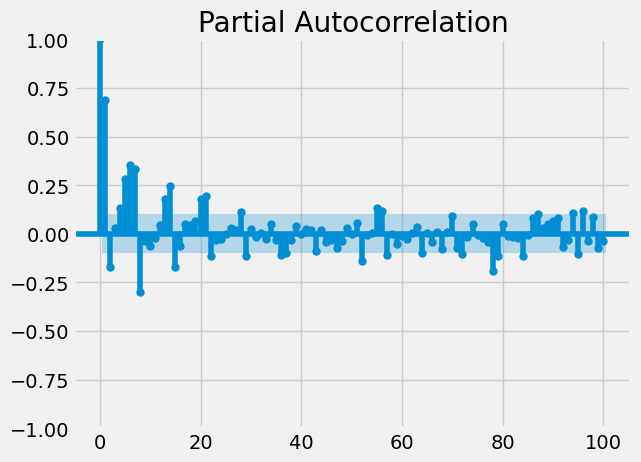

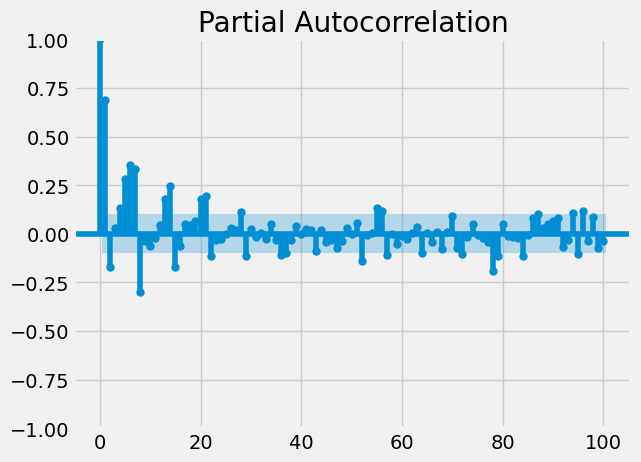

In [15]:
plot_pacf(data['Views'], lags=100)

q = 2

In [22]:
p,d,q = 5,1,2
model = sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p,d,q),
                                seasonal_order=(p,d,q,12))
models = model.fit()
print(models.summary())


C:\Users\darsh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\darsh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3098.959
Date:                            Sun, 03 Sep 2023   AIC                           6227.917
Time:                                    17:10:03   BIC                           6286.941
Sample:                                         0   HQIC                          6251.343
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7714      0.131      5.893      0.000       0.515       1.028
ar.L2         -0.7970      0.136   

In [23]:
print(models.params)

ar.L1       7.713897e-01
ar.L2      -7.970186e-01
ar.L3      -1.386472e-01
ar.L4      -1.977390e-01
ar.L5      -1.511114e-01
ma.L1      -1.176702e+00
ma.L2       8.995899e-01
ar.S.L12   -2.529537e-01
ar.S.L24    5.728460e-02
ar.S.L36   -1.707386e-01
ar.S.L48   -2.021896e-01
ar.S.L60    1.123044e-02
ma.S.L12   -6.897020e-01
ma.S.L24   -1.346230e-01
sigma2      1.256708e+06
dtype: float64


In [24]:
predictions = models.predict(len(data),len(data)+50)
print(predictions)

391     9887.125015
392    10800.676256
393    10715.792753
394     9831.339073
395     8779.259062
396     8248.361615
397     8947.279502
398     9724.911098
399    10315.837467
400    10583.416764
401     9867.807483
402     9318.975751
403     8998.701729
404     9081.386524
405    10496.903232
406    10998.236682
407    10902.465404
408    10051.941744
409     9390.766445
410     8609.254777
411     9194.690844
412    10357.568804
413    10655.454513
414    10812.382044
415    10234.870766
416     9381.666799
417     8956.518145
418     9167.283080
419     9951.348852
420    10290.027497
421    10738.016675
422     9880.682633
423     9479.957318
424     8970.745141
425     8883.677415
426    10215.295120
427    10909.944530
428    10914.071440
429    10333.076464
430     9378.881607
431     8679.105588
432     8753.470649
433    10131.314919
434    10587.857351
435    10877.277138
436    10396.246585
437     9287.120011
438     9157.982462
439     9400.572974
440    10362.597844


<AxesSubplot:>

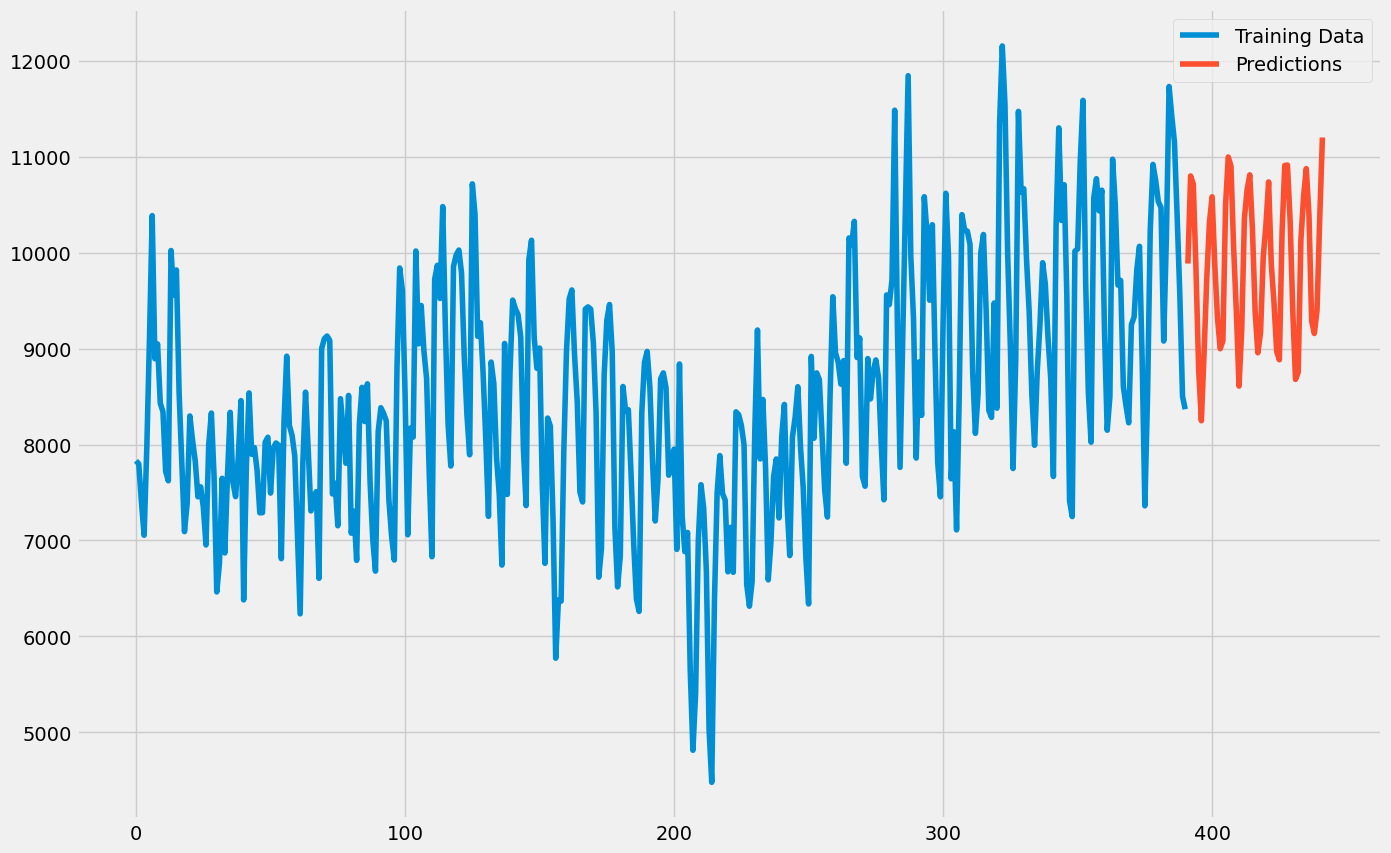

In [25]:
data['Views'].plot(legend=True,label='Training Data',
                  figsize=(15,10))
predictions.plot(legend=True,label='Predictions')